In [1]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.losses import BinaryCrossentropy,SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
dir_path='prepared_dataset'

#training dataset
x_train=np.load(os.path.join(dir_path,'train_images.npy'))
y_train=np.load(os.path.join(dir_path,'train_labels.npy'))

#cross validation dataset
x_cv=np.load(os.path.join(dir_path,'cross_validation_images.npy'))
y_cv=np.load(os.path.join(dir_path,'cross_validation_labels.npy'))

#test dataset
x_test=np.load(os.path.join(dir_path,'test_images.npy'))
y_test=np.load(os.path.join(dir_path,'test_labels.npy'))

In [3]:
y_train=np.expand_dims(y_train,axis=1)
y_cv=np.expand_dims(y_cv,axis=1)
y_test=np.expand_dims(y_test,axis=1)

In [4]:
print(f"shape of X_train,y_train = {x_train.shape},{y_train.shape} \n"+
      f"shape of X_cv,y_cv = {x_cv.shape},{y_cv.shape} \n"+
      f"shape of X_test,y_test = {x_test.shape},{y_test.shape}")

shape of X_train,y_train = (445, 278, 278, 3),(445, 1) 
shape of X_cv,y_cv = (56, 278, 278, 3),(56, 1) 
shape of X_test,y_test = (56, 278, 278, 3),(56, 1)


In [5]:
features=278*278*3

x_train_reshaped=x_train.reshape((445,features))
x_cv_reshaped=x_cv.reshape((56,features))
x_test_reshaped=x_test.reshape((56,features))

print("After reshaping : ")
print(f"shape of X_train,y_train = {x_train_reshaped.shape},{y_train.shape} \n"+
      f"shape of X_cv,y_cv = {x_cv_reshaped.shape},{y_cv.shape} \n"+
      f"shape of X_test,y_test = {x_test_reshaped.shape},{y_test.shape}")

After reshaping : 
shape of X_train,y_train = (445, 231852),(445, 1) 
shape of X_cv,y_cv = (56, 231852),(56, 1) 
shape of X_test,y_test = (56, 231852),(56, 1)


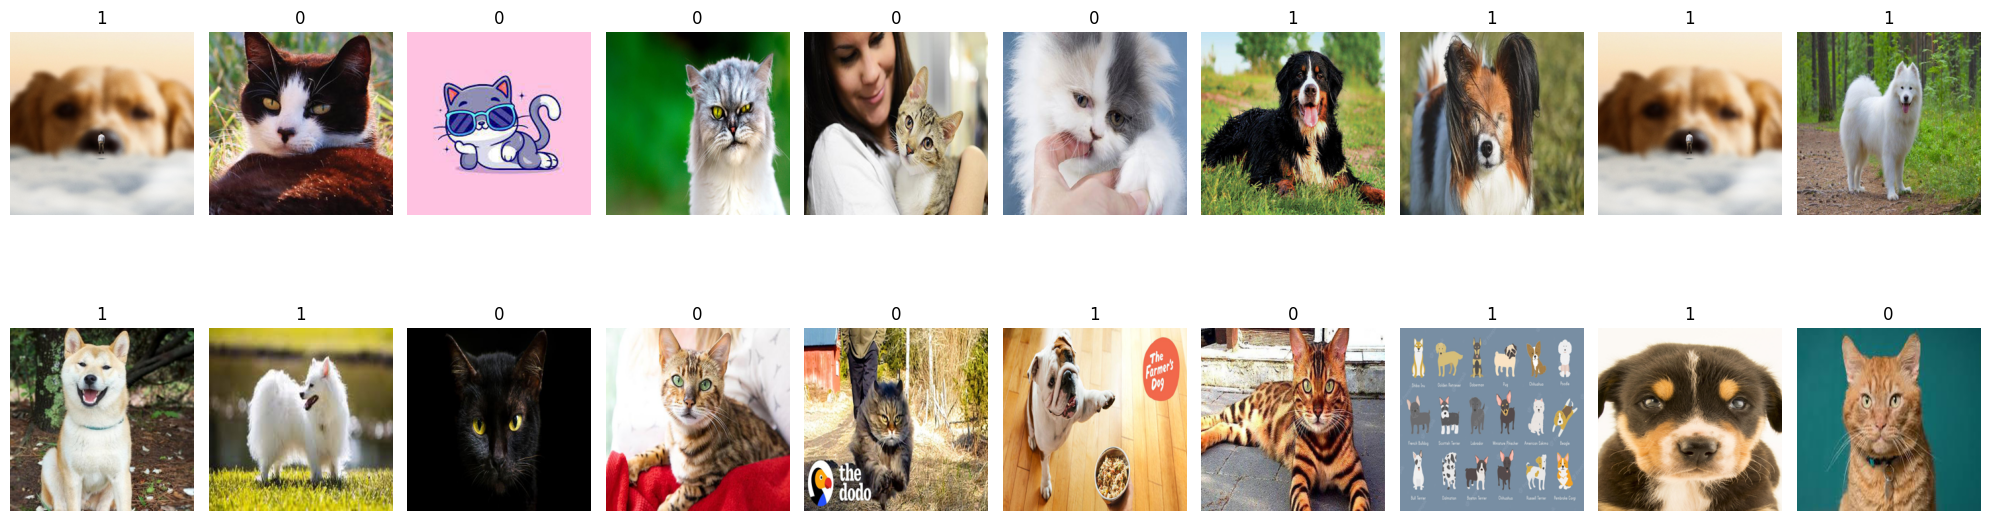

In [6]:
fig,axis=plt.subplots(2,10,figsize=(20,10))
np.random.seed(42)
for i in range(2):
    for j in range(10):
        index=np.random.randint(x_train.shape[0])
        axis[i,j].imshow(x_train[index].reshape(278,278,3))
        axis[i,j].set_title(y_train[index].squeeze())
        axis[i,j].set_axis_off()
        plt.tight_layout()
        


In [7]:
scaler=StandardScaler()
x_train_reshaped_scaled=scaler.fit_transform(x_train_reshaped)
x_cv_reshaped_scaled=scaler.transform(x_cv_reshaped)

In [8]:
lambdas=[0.0,0.1,0.5,0.001,0.005,0.0001]
models=[]
J_trains=[]
J_cvs=[]
for i in range(len(lambdas)):
    lambda_=lambdas[i]
    model = Sequential([
        tf.keras.Input((231852,)),
        Dense(units=640, activation='relu', name='layer_1',kernel_regularizer=l2(lambda_)),
        Dense(units=325, activation='relu', name='layer_2',kernel_regularizer=l2(lambda_)),
        Dense(units=120, activation='relu', name='layer_3',kernel_regularizer=l2(lambda_)),
        Dense(units=2, activation='linear', name='layer_4')
    ], name='model_2')

    models.append(model)
    
    model.compile(optimizer=Adam(0.01),loss=SparseCategoricalCrossentropy(from_logits=True))

    history=model.fit(x_train_reshaped_scaled,y_train,epochs=50)

    logits_train = model.predict(x_train_reshaped_scaled)

    yhat_train = tf.nn.softmax(logits_train, axis=1).numpy()
    prob_train = np.argmax(yhat_train, axis=1)
    J_train = np.mean(prob_train != y_train)
    J_trains.append(J_train)
    # J_cv
    logits_cv = model.predict(x_cv_reshaped_scaled)
    yhat_cv = tf.nn.softmax(logits_cv, axis=1).numpy()
    prob_cv = np.argmax(yhat_cv, axis=1)
    J_cv = np.mean(prob_cv != y_cv)
    J_cvs.append(J_cv)
# model.summary()


Epoch 1/50

14/14 [==============================] - 26s 2s/step - loss: 890.4377
Epoch 2/50
14/14 [==============================] - 25s 2s/step - loss: 106.3897
Epoch 3/50
14/14 [==============================] - 25s 2s/step - loss: 41.6668
Epoch 4/50
14/14 [==============================] - 24s 2s/step - loss: 23.6757
Epoch 5/50
14/14 [==============================] - 23s 2s/step - loss: 7.4609
Epoch 6/50
14/14 [==============================] - 21s 2s/step - loss: 1.9925
Epoch 7/50
14/14 [==============================] - 21s 2s/step - loss: 1.6024
Epoch 8/50
14/14 [==============================] - 21s 2s/step - loss: 0.8348
Epoch 9/50
14/14 [==============================] - 21s 2s/step - loss: 0.5580
Epoch 10/50
14/14 [==============================] - 21s 2s/step - loss: 0.8818
Epoch 11/50
14/14 [==============================] - 22s 2s/step - loss: 1.0421
Epoch 12/50
14/14 [==============================] - 22s 2s/step - loss: 0.6851
Epoch 13/50
14/14 [======================

In [13]:
print("RESULTS ======>")
for i in range(len(J_trains)):
    print(f"J_train = {J_trains[i]}  " +
          f"J_cv = {J_cvs[i]}  ")

RESULTS ======>
J_train = 0.5033808862517359  J_cv = 0.4872448979591837  
J_train = 0.4853932584269663  J_cv = 0.5357142857142857  
J_train = 0.4853932584269663  J_cv = 0.5357142857142857  
J_train = 0.5021335689938139  J_cv = 0.4987244897959184  
J_train = 0.49359929301855826  J_cv = 0.5153061224489796  
J_train = 0.48841307915667215  J_cv = 0.5242346938775511  


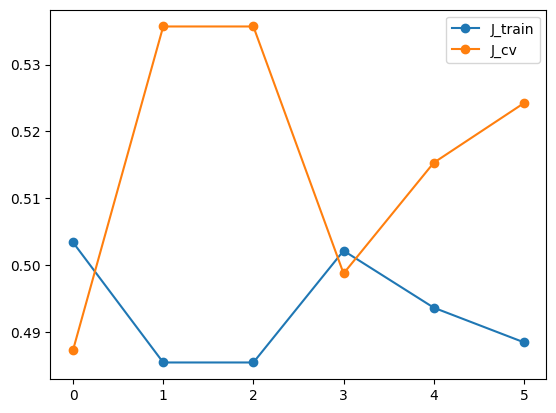

In [15]:
x_axis=np.arange(6)
plt.plot(x_axis,J_trains,'-o',label='J_train')
plt.plot(x_axis,J_cvs,'-o',label='J_cv')
plt.legend()
plt.show()

In [9]:
# plt.plot(history.history['loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train'], loc='upper right')
# plt.show()

In [10]:
# threshold=0.5

# logits_train = model.predict(x_train_reshaped_scaled)
# yhat_train = tf.nn.softmax(logits_train, axis=1).numpy()
# prob_train = np.argmax(yhat_train, axis=1)
# J_train = np.mean(prob_train != y_train)

# # J_cv
# logits_cv = model.predict(x_cv_reshaped_scaled)
# yhat_cv = tf.nn.softmax(logits_cv, axis=1).numpy()
# prob_cv = np.argmax(yhat_cv, axis=1)
# J_cv = np.mean(prob_cv != y_cv)


# print(f"J_train : {J_train} \n"+f"J_cv : {J_cv}")

In [11]:
# fig,axis=plt.subplots(2,10,figsize=(20,10))
# for i in range(2):
#     for j in range(10):
#         index=np.random.randint(x_cv.shape[0])
#         axis[i,j].imshow(x_cv[index].reshape(278,278,3))
#         axis[i,j].set_title(prob_cv[index].squeeze())
#         axis[i,j].set_axis_off()
#         plt.tight_layout()

2/2 [==============================] - 0s 96ms/step


<Axes: >

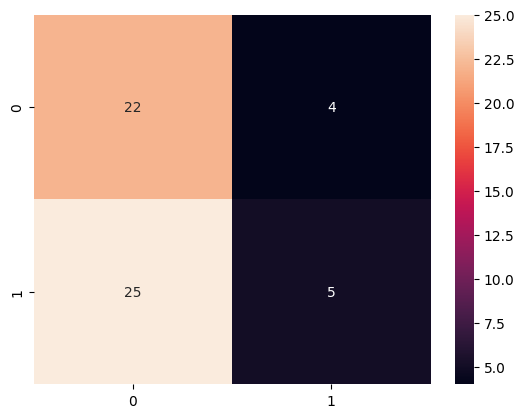

In [19]:
i=5

logits_cv = models[i].predict(x_cv_reshaped_scaled)
yhat_cv = tf.nn.softmax(logits_cv, axis=1).numpy()
prob_cv = np.argmax(yhat_cv, axis=1)
J_cv = np.mean(prob_cv != y_cv)
sns.heatmap(confusion_matrix(y_cv,prob_cv),annot=True)